In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%load_ext autoreload
%autoreload 2

In [14]:
import sys
sys.path.insert(0, "../")
import guitarHarmony as gt
print(gt.__version__)
from itertools import product
import random

0.5.4


('C', 4, 'C4', 1.0)

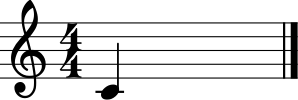

In [21]:
import guitarHarmony as gt
a=gt.Note()
a.name, a.octave, a.nameWithOctave, a.duration
# a.show('notation')
a.show('midi')
a.show('')

('Fb', 5, 'Fb5', 2.5)

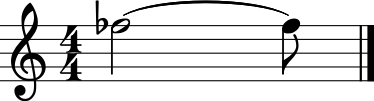

In [22]:
import guitarHarmony as gt
a=gt.Note('Fb5', 2.5)
a.name, a.octave, a.nameWithOctave, a.duration
# a.show('notation')
a.show('midi')
a.show('')

Inv.P1


Inv.P1


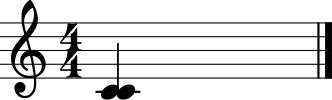

Inv.A1


Inv.A1


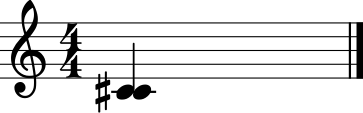

Inv.d2


Inv.d2


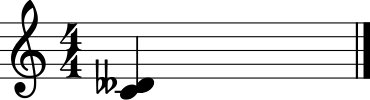

In [30]:
import guitarHarmony as gt
for intv in gt.Interval.displayAllIntervals()[:3]:
    gt.Interval(intv).show('midi')
    gt.Interval(intv).show()

[Note(C), Note(E), Note(G), Note(Bb)]

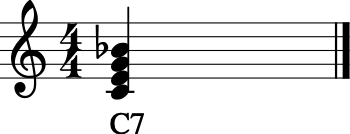

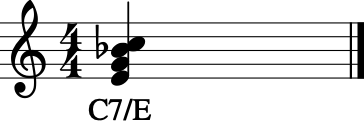

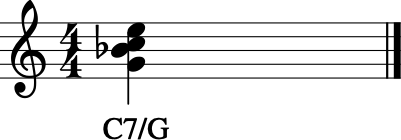

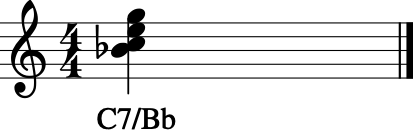

[Note(C), Note(E), Note(G)]

[Note(C), Note(Eb), Note(G)]

[Note(C), Note(Eb), Note(Gb)]

In [46]:
import guitarHarmony as gt
root='C'
chord_type='7'
chord = gt.Chord(root, chord_type)
chord.chord_notes
for i in range(4):
    chord.getInversion(i).show('notation')

root = 'CDEFGAB'
for t in gt.Chord.displayAllChordsRecipe()[:3]:
    gt.Chord('C', chord_type=t).buildArpeggio()

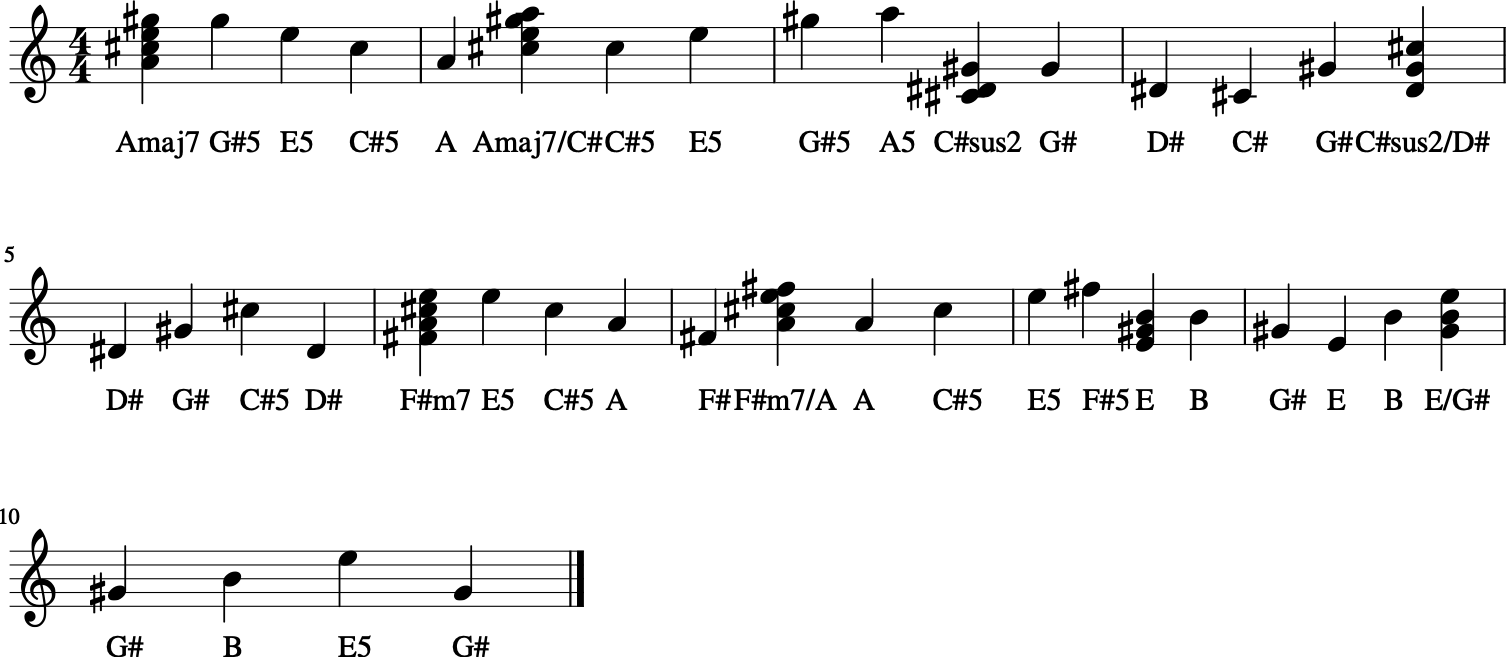

In [49]:
import guitarHarmony as gt
elements  = []
for bass, chord in[('A', 'maj7'), ('C#','sus2'), ('F#', 'm7'), ('E', '')]: 
	a = gt.Chord(bass, chord)
	if len(a.chord_notes) == 4:
		elements.append(a)
		elements.extend(a.arpeggio[::-1])
		b = a.getInversion(1)
		elements.append(b)
		elements.extend(b.arpeggio)
	else:
		elements.append(a)
		elements.extend(a.arpeggio[::-1])
		elements.append(a.arpeggio[2])
		b = a.getInversion(1)
		elements.append(b)
		elements.extend(b.arpeggio)
		elements.extend(b.arpeggio[:1])
s = gt.Stream(elements)
# s.show('')
# s.show('text')
s.show('notation')
s.show('midi')
# s.show('')